# Data Exploration

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from scipy import stats
import datetime 
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')
from data_preProcessing import data_preProcessing_script
from data_cleaner import DataCleaner

In [3]:
# loading the dataset
store_data = pd.read_csv('../data/store.csv')
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [4]:
# loading the joined dataset
train_store = pd.read_csv('../data/train_store.csv')
test_store = pd.read_csv('../data/test_store.csv')

## Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [5]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
from data_exploration import exploration

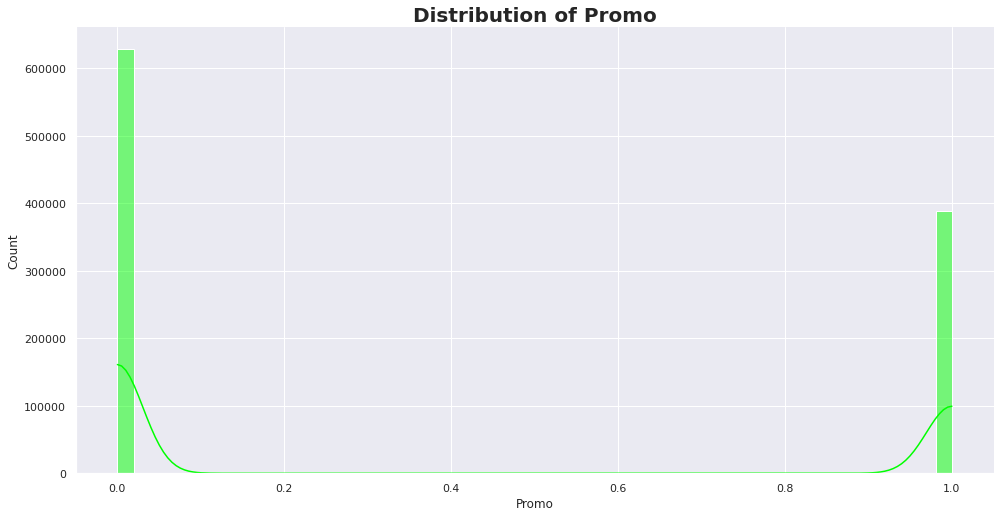

In [8]:
exploration.plot_hist(train_data, 'Promo', 'lime')

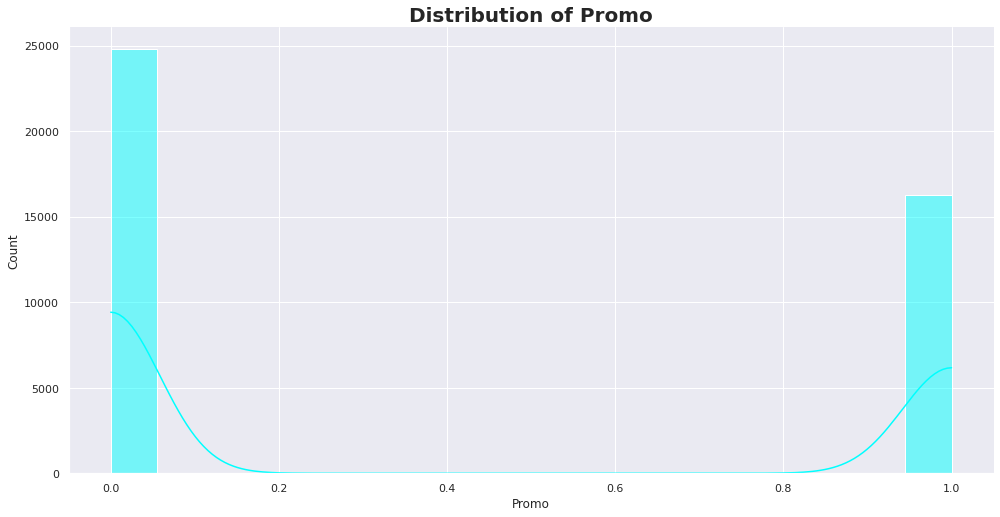

In [9]:
exploration.plot_hist(test_data, 'Promo', 'cyan')

In [10]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [12]:
# promo and sales 
sales_promo = train_data.groupby('Promo')["Sales"].sum()

In [13]:
promo_sale= pd.DataFrame({'Promo':sales_promo.index, 'sales_sum':sales_promo.values})
promo_sale.head()

,Promo,sales_sum
0,0,2771974337
1,1,3101206286


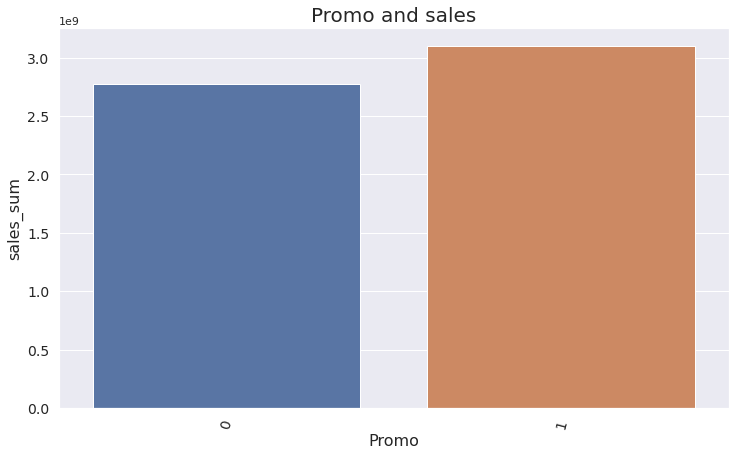

In [14]:
exploration.plot_bar(promo_sale, 'Promo', 'sales_sum', 'Promo and sales', 'Promo', 'sales_sum')

In [15]:
customers_promo = train_data.groupby('Promo')["Customers"].sum()

In [16]:
promo_customers= pd.DataFrame({'Promo':customers_promo.index, 'Customers':customers_promo.values})
promo_customers.head()

,Promo,Customers
0,0,325777807
1,1,318263948


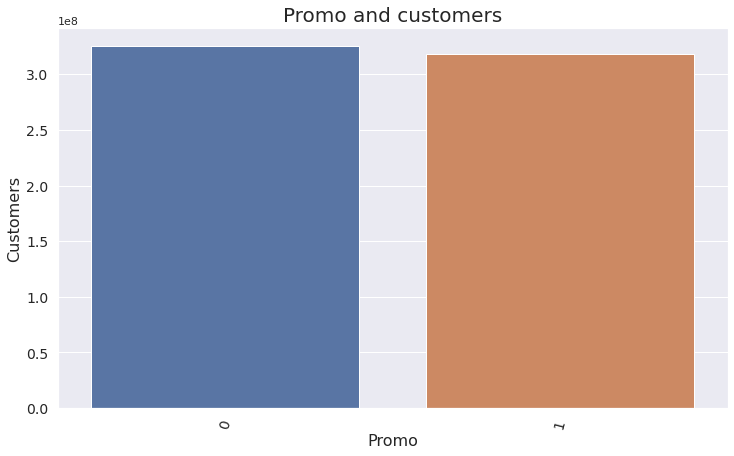

In [17]:
exploration.plot_bar(promo_customers, 'Promo', 'Customers', 'Promo and customers', 'Promo', 'Customers')

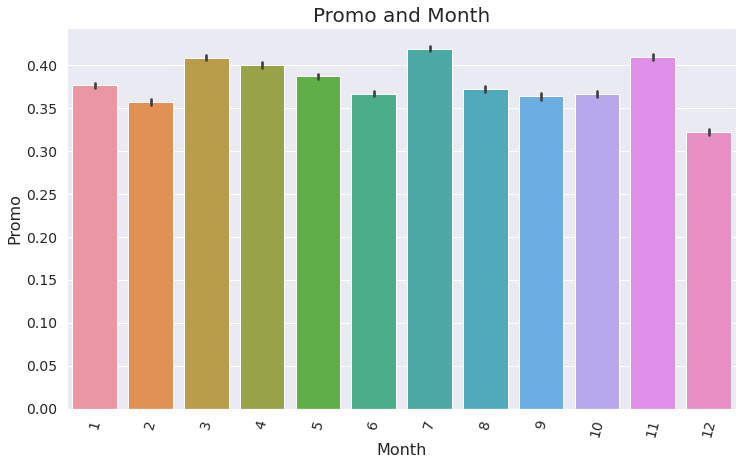

In [18]:
exploration.plot_bar(train_store, 'Month', 'Promo', 'Promo and Month', 'Month', 'Promo')

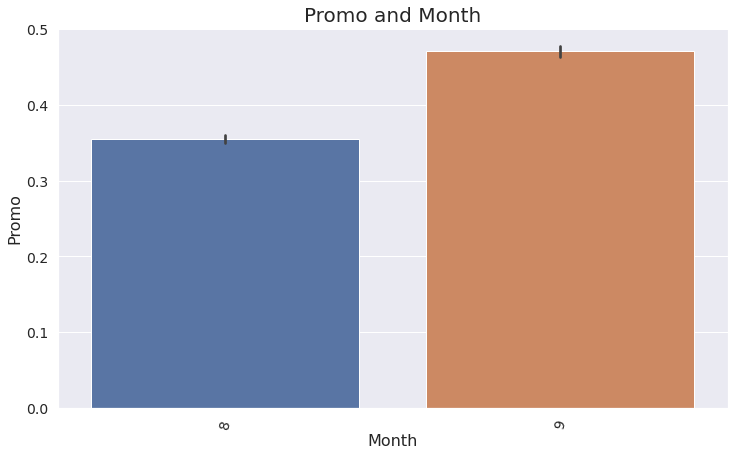

In [19]:
exploration.plot_bar(test_store, 'Month', 'Promo', 'Promo and Month', 'Month', 'Promo')

## Check & compare sales behavior before, during and after holidays

In [20]:
state_holiday_list = train_data['StateHoliday'].values.tolist()
def modify_holiday_list(holiday_list:list) -> list:
    new_index = ["neither"] * len(holiday_list)
    for index , value in enumerate(holiday_list):
        if value == 'a': #public holiday
            affect_list(new_index, 3, 1, index)
        elif value == 'b': #Easter
            affect_list(new_index, 10, 50, index)
        elif value == 'c': # christmas
            affect_list(new_index, 5, 12, index)
        else:
            pass

    return new_index

In [21]:
# get state holiday list
# 10 days for Easter
# 3 days for public holiday
# Considering christmas lasts for 12 days, Easter for 50 days and public holidays for 1 day.
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
def affect_list(change_list, interval, duration, index):
    start_pt = int(index-duration/2) - interval
    try:
        for index in range(start_pt, start_pt + interval):
            change_list[index] = 'before'
        for index in range(start_pt + interval, start_pt + interval + duration):
            change_list[index] = 'during'
        for index in range(start_pt + interval + duration, start_pt + interval + duration + interval):
            change_list[index] = 'after'
    except:
        pass

    return change_list

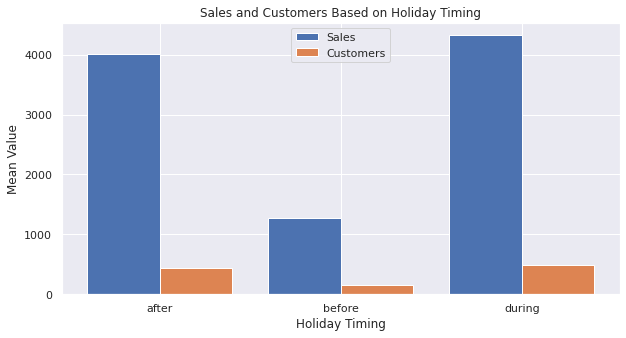

In [22]:
sales_timing_list = modify_holiday_list(state_holiday_list)
timing_added_df = train_data.loc[:,['Sales','Customers']]
timing_added_df['HolidayTiming'] = sales_timing_list
grouped_timing = timing_added_df.groupby('HolidayTiming').agg(
    {'Sales': 'mean', 'Customers': 'mean'})
grouped_timing = grouped_timing.iloc[:3, :]

plt.figure(figsize=(10,5))
X_axis = np.arange(len(grouped_timing.index))
plt.bar(X_axis - 0.2, grouped_timing['Sales'], 0.4, label='Sales')
plt.bar(X_axis + 0.2, grouped_timing['Customers'], 0.4, label='Customers')

plt.xticks(X_axis, grouped_timing.index)
plt.xlabel("Holiday Timing")
plt.ylabel("Mean Value")
plt.title("Sales and Customers Based on Holiday Timing")
plt.legend()

## Find out any seasonal (Christmas, Easter etc) purchase behaviours,

In [23]:
# Create Year and Month columns
train_data['Year']  = train_data['Date'].apply(lambda x: int(str(x)[:4]))
train_data['Month'] = train_data['Date'].apply(lambda x: int(str(x)[5:7]))

test_data['Year']  = test_data['Date'].apply(lambda x: int(str(x)[:4]))
test_data['Month'] = test_data['Date'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
train_data['Date'] = train_data['Date'].apply(lambda x: (str(x)[:7]))
test_data['Date']     = test_data['Date'].apply(lambda x: (str(x)[:7]))

In [24]:
average_sales = train_data.groupby('StateHoliday')["Sales"].mean()
# average_sales = average_sales.iloc[2:,:]

[Text(0, 0, '0'),
 Text(1, 0, '0'),
 Text(2, 0, 'a'),
 Text(3, 0, 'b'),
 Text(4, 0, 'c')]

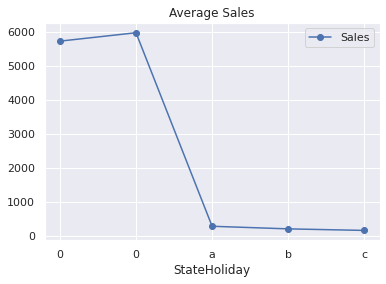

In [25]:
ax1 = average_sales.plot(legend=True,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())

In [26]:
# aggregated df from sales mean and custmers mean
seasonal = train_data.groupby('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[2:,:]
seasonal.head()

,Sales,Customers
StateHoliday,,
a,290.735686,43.817670
b,214.311510,36.561883
c,168.733171,27.174390


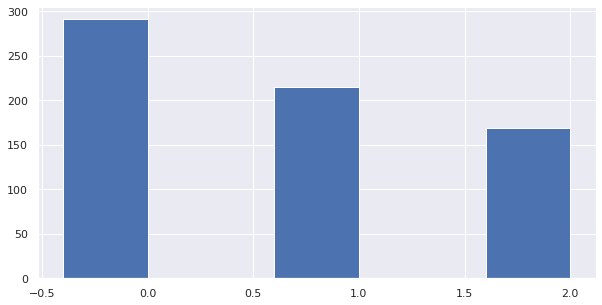

In [27]:
# 
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')

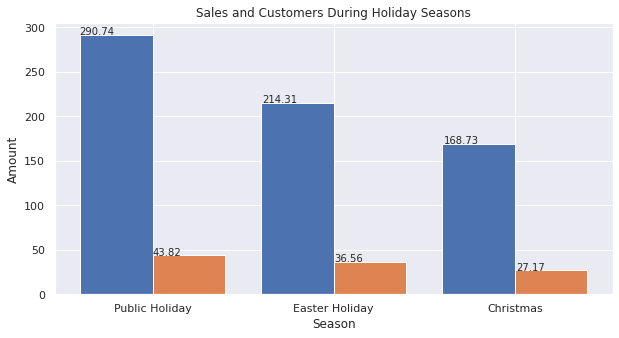

In [28]:
# seasonal index
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, seasonal['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                       * 1.005, p.get_height() * 1.005))     
plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales and Customers During Holiday Seasons")
plt.show()

## What can you say about the correlation between sales and number of customers?

In [29]:
sales_customer_rln = train_data.loc[:,['Sales','Customers']]
sales_cutomer_corr = sales_customer_rln.corr()
sales_cutomer_corr.head()

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


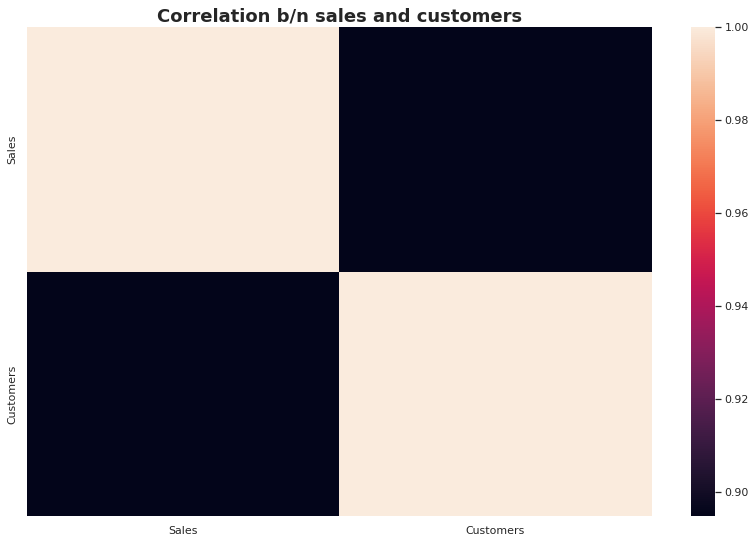

In [30]:
exploration.plot_heatmap_from_correlation(sales_cutomer_corr, 'Correlation b/n sales and customers')

## How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [31]:
sales_promo_rln = train_store.loc[:,['Sales','Promo']]
sales_promo_corr = sales_promo_rln.corr()
sales_promo_corr.head()

,Sales,Promo
Sales,1.000000,0.461348
Promo,0.461348,1.000000


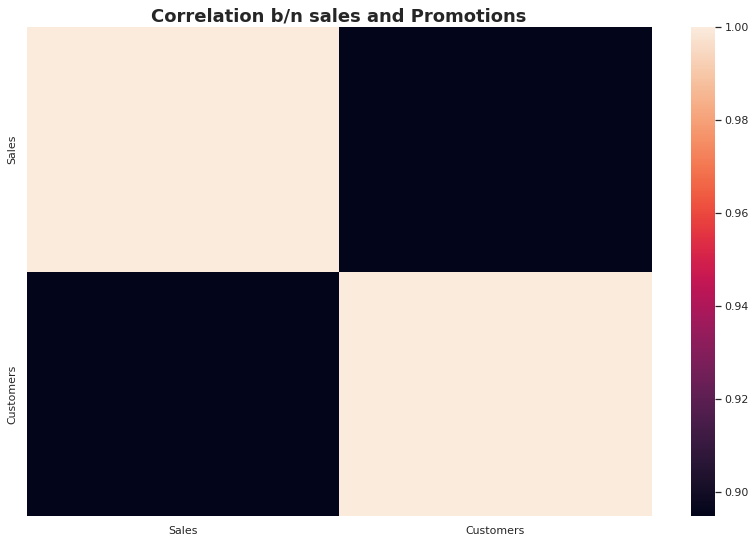

In [32]:
exploration.plot_heatmap_from_correlation(sales_cutomer_corr, 'Correlation b/n sales and Promotions')

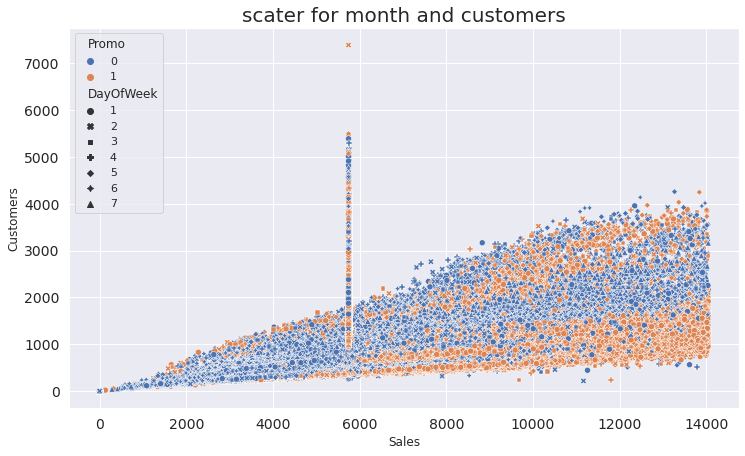

In [33]:
exploration.plot_scatter(train_store, 'Sales','Customers', 'scater for month and customers', 'Promo', 'DayOfWeek')

## Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

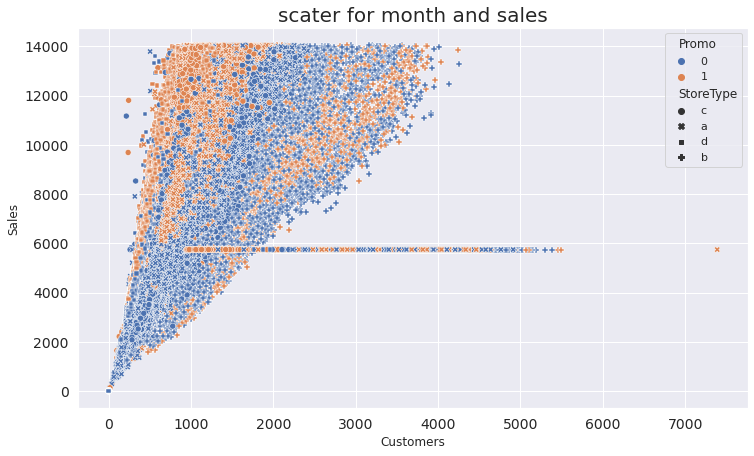

In [34]:
exploration.plot_scatter(train_store, 'Customers','Sales', 'scater for month and sales', 'Promo', 'StoreType')

## Trends of customer behavior during store open and closing times

In [35]:
customer_behaviour = train_data.groupby('Open').agg({'Customers':'mean','Sales':'mean'})
customer_behaviour.head()

,Customers,Sales
Open,,
0,0.000000,0.000000
1,762.728395,6955.514291


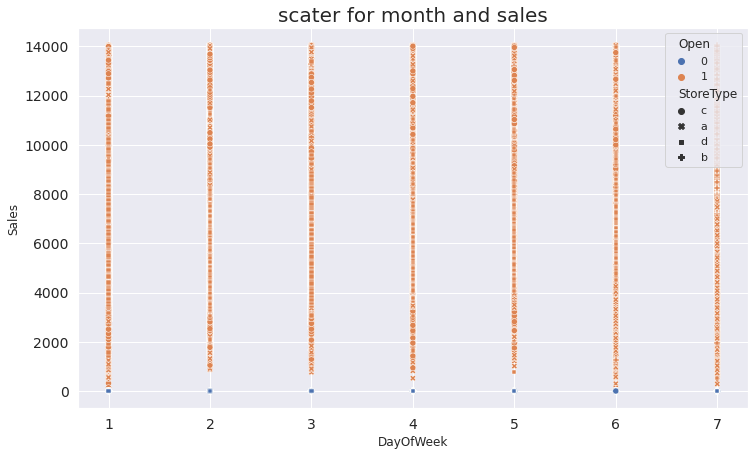

In [37]:
exploration.plot_scatter(train_store, 'DayOfWeek','Sales', 'scater for month and sales', 'Open', 'StoreType')

## Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [38]:
weekly_data = train_store.groupby(['DayOfWeek']).agg({'Sales': ['sum'], 'Open': ['sum']})
weekly_data.columns = ['sales', 'Open']
weekly_data = weekly_data.reset_index()

In [39]:
weekly_data.head()

,DayOfWeek,sales,Open
0,1,1.021350e+09,137560
1,2,9.677270e+08,143961
2,3,9.191451e+08,141936
3,4,8.768126e+08,134644
4,5,9.424836e+08,138640


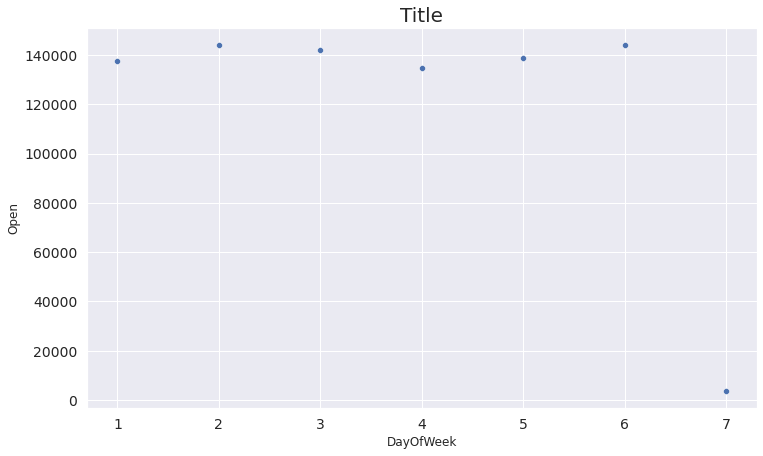

In [40]:
exploration.simple_plot_scatter(weekly_data, 'DayOfWeek', 'Open', 'Title')

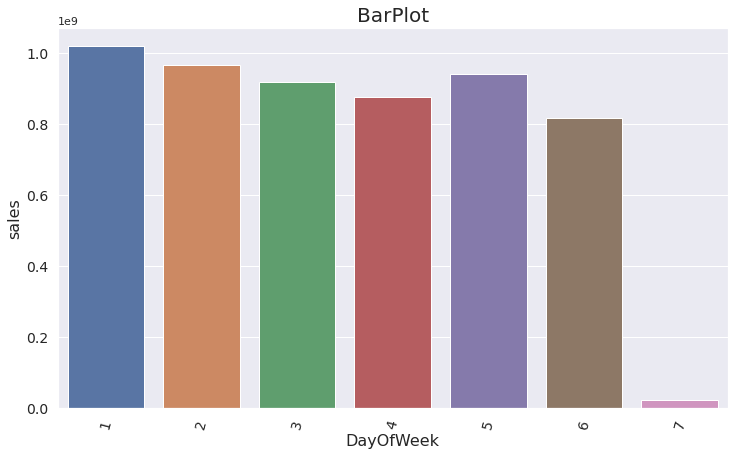

In [41]:
exploration.plot_bar(weekly_data, 'DayOfWeek', 'sales', 'BarPlot', 'DayOfWeek', 'sales')

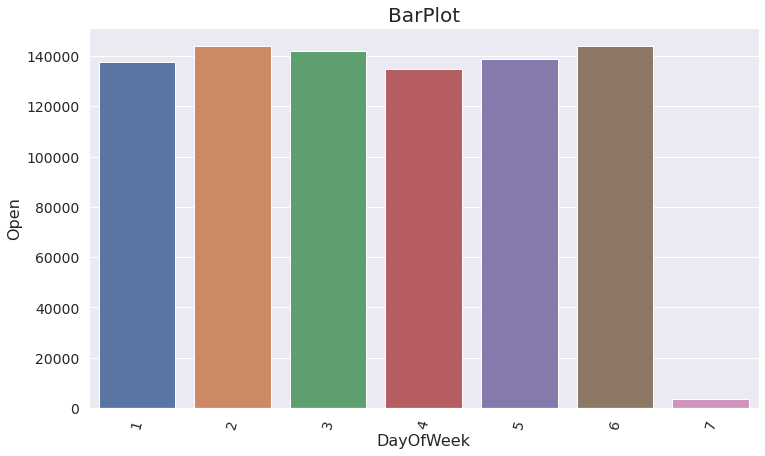

In [42]:
exploration.plot_bar(weekly_data, 'DayOfWeek', 'Open', 'BarPlot', 'DayOfWeek', 'Open')

In [43]:
weekly_data = train_store.groupby(['StoreType']).agg({'Open': ['sum'], 'DayOfWeek': ['count']})
weekly_data.columns = ['Open', 'DayOfWeek']
weekly_data = weekly_data.reset_index()

In [44]:
weekly_data

,StoreType,Open,DayOfWeek
0,a,457077,551627
1,b,15563,15830
2,c,112978,136840
3,d,258774,312912


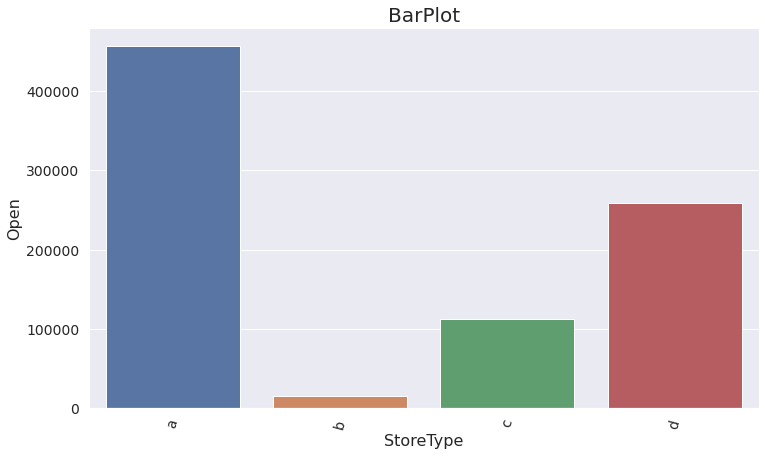

In [45]:
exploration.plot_bar(weekly_data, 'StoreType', 'Open', 'BarPlot', 'StoreType', 'Open')

## Check how the assortment type affects sales

<AxesSubplot:xlabel='Assortment', ylabel='Customers'>

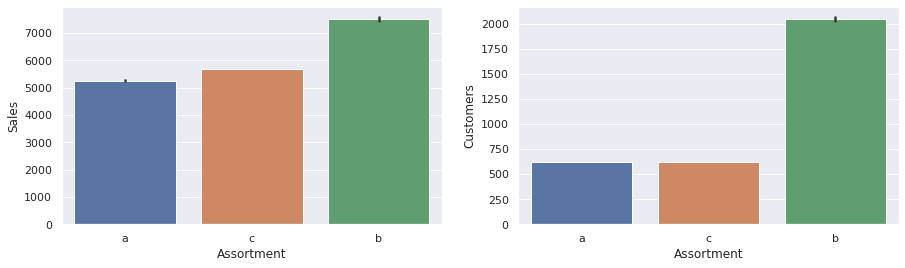

In [46]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=train_store, ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=train_store,  ax=axis2)

## How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?


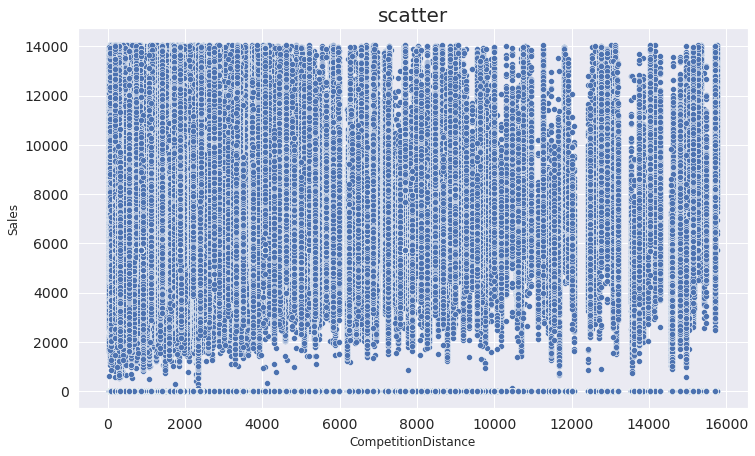

In [47]:
exploration.simple_plot_scatter(train_store, 'CompetitionDistance', 'Sales', 'scatter')

## How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance
